In [31]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [32]:
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [33]:
mnist.data.shape

(70000, 784)

In [78]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

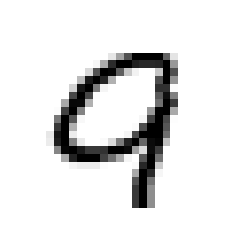

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

random_digit = x[2000]
random_digit_image = digit.reshape(28, 28)

plt.imshow(random_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [66]:
y[2000]

0

In [85]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [86]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [87]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [88]:

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=1)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=1, shuffle=True, tol=-inf, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [94]:
print(sgd_clf.predict([x[98]]))

[ True]


In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=None)
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_folds = X_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct / len(y_pred))
    

0.951
0.95885
0.96445


In [102]:
#or can simply do
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.951  , 0.95885, 0.96445])

In [104]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [109]:
from sklearn.metrics import confusion_matrix

nums = confusion_matrix(y_train_5, y_train_pred)

In [108]:
confusion_matrix(y_train_5, y_train_5)  #just an example I tested to show what perfect classification would output

array([[54579,     0],
       [    0,  5421]])

In [118]:
val = nums[0,1]/(nums[0,1]+nums[1,0])

In [119]:
val

0.43516308671439935

In [121]:
#BELOW TWO ARE THE CORRECT WAY TO ANALYZE A MODEL, AS SEEN HERE THE SCORE IS ACTUALLY 78% WHICH IS MUCH WORSE THAN THE 90 PERCENT SHOWN BEFORE
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.785279685966634

In [122]:
recall_score(y_train_5, y_train_pred)

0.7380557092787309

In [124]:
#this computes a combination of the above two values, which is pretty useful when Recall and Precision vals are similar
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7609357170026627

In [126]:
y_scores = sgd_clf.decision_function([random_digit])
y_scores

array([-362512.01650836])

In [149]:
#manually change threshold value to either decrease recall/increase precision and vise versa
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [150]:
threshold = -100000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [161]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")


In [162]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [163]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

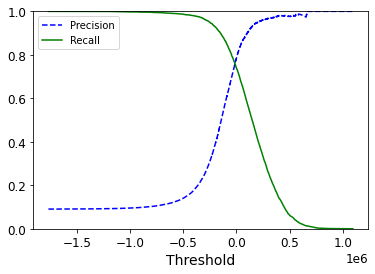

In [165]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [167]:
y_train_pred_90 = (y_scores > 70000)

In [168]:
precision_score(y_train_5, y_train_pred_90)

0.8755112474437627

In [169]:
recall_score(y_train_5, y_train_pred_90)

0.6318022505072864

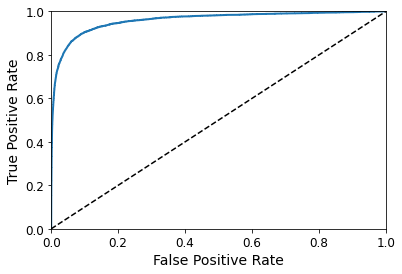

In [173]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()